In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
df = pd.read_csv("/media/soundarzozm/New Volume/Data Science/Datasets/Aws data 16 to 23 May 2021.csv", index_col="S NO.")

In [3]:
df

,DISTRICT,STATION,DATE(YYYY-MM-DD),TIME (UTC),RAIN FALL CUM. SINCE 0300 UTC (mm),TEMP. ('C),TEMP DAY MIN MAX ('C),RH (%),RH DAY MIN MAX (%),WIND DIR 10 m (Deg),WIND SPEED 10 m (Kt),WIND SPEED MAX / GUST 10 m (Kt),SLP (hPa),MSLP (hPa / gpm),SUN SHINE (HH.MM),BATTERY (Volts),GPS
S NO.,,,,,,,,,,,,,,,,,
1,EAST_DELHI,SALWAN_PUBLIC_SCHOOL,16/05/2021,00:00:00,0.0,24.1,NaN,52.0,NaN,279.0,0.0,2.0,982.7,1005.8,NaN,12.6,L
2,EAST_DELHI,SALWAN_PUBLIC_SCHOOL,16/05/2021,00:15:00,0.0,23.7,NaN,53.0,NaN,294.0,0.0,2.0,982.7,1005.8,NaN,12.6,L
3,EAST_DELHI,SALWAN_PUBLIC_SCHOOL,16/05/2021,00:30:00,0.0,23.7,NaN,54.0,NaN,240.0,0.0,0.0,982.9,1006.0,NaN,12.6,L
4,EAST_DELHI,SALWAN_PUBLIC_SCHOOL,16/05/2021,01:00:00,0.0,24.4,NaN,55.0,NaN,207.0,0.0,2.0,983.5,1006.6,NaN,12.6,L
5,EAST_DELHI,SALWAN_PUBLIC_SCHOOL,16/05/2021,01:15:00,0.0,25.4,NaN,52.0,NaN,183.0,0.0,1.0,983.5,1006.5,NaN,12.6,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,SOUTH_WEST_DELHI,NAJAFGARH,23/05/2021,12:30:00,0.0,31.3,NaN,51.0,NaN,268.0,1.0,9.0,980.0,1002.8,NaN,12.8,L
5238,SOUTH_WEST_DELHI,NAJAFGARH,23/05/2021,12:45:00,0.0,30.9,NaN,50.0,NaN,305.0,1.0,5.0,980.5,1003.4,NaN,12.6,L
5239,SOUTH_WEST_DELHI,NAJAFGARH,23/05/2021,13:00:00,0.0,30.5,NaN,49.0,NaN,273.0,0.0,5.0,980.6,1003.5,NaN,12.5,L


In [4]:
df.columns

Index(['DISTRICT', 'STATION', 'DATE(YYYY-MM-DD)', 'TIME (UTC)',
       'RAIN FALL CUM. SINCE 0300 UTC (mm)', 'TEMP. ('C)',
       'TEMP DAY MIN MAX ('C)', 'RH (%)', 'RH DAY MIN MAX (%)',
       'WIND DIR 10 m (Deg)', 'WIND SPEED 10 m (Kt)',
       'WIND SPEED MAX / GUST 10 m (Kt)', 'SLP (hPa)', 'MSLP (hPa / gpm)',
       'SUN SHINE (HH.MM)', 'BATTERY (Volts)', 'GPS'],
      dtype='object')

In [5]:
df.describe()

,RAIN FALL CUM. SINCE 0300 UTC (mm),TEMP. ('C),TEMP DAY MIN MAX ('C),RH (%),RH DAY MIN MAX (%),WIND DIR 10 m (Deg),WIND SPEED 10 m (Kt),WIND SPEED MAX / GUST 10 m (Kt),SLP (hPa),MSLP (hPa / gpm),SUN SHINE (HH.MM),BATTERY (Volts)
count,5241.000000,5241.000000,135.000000,4881.000000,0.0,3938.000000,3938.000000,3938.000000,5241.000000,5241.000000,0.0,5241.000000
mean,3.059531,27.979222,28.362963,64.296865,NaN,181.618334,1.834688,5.985526,978.786567,1003.369109,NaN,12.755161
std,13.493531,4.893439,6.419731,24.924323,NaN,105.385401,1.508707,3.941475,3.937023,3.201068,NaN,0.670106
min,0.000000,18.900000,18.800000,1.000000,NaN,0.000000,0.000000,0.000000,965.900000,990.500000,NaN,10.100000
25%,0.000000,24.100000,22.500000,47.000000,NaN,96.000000,1.000000,3.000000,976.500000,1001.900000,NaN,12.500000
50%,0.000000,27.600000,27.500000,64.000000,NaN,174.000000,2.000000,5.000000,979.900000,1003.900000,NaN,12.600000
75%,0.500000,31.400000,33.300000,87.000000,NaN,281.000000,3.000000,8.000000,981.700000,1005.600000,NaN,12.900000
max,95.500000,41.500000,41.600000,100.000000,NaN,359.000000,14.000000,31.000000,987.000000,1012.300000,NaN,14.700000


In [6]:
df = df.drop(columns=["DISTRICT", "STATION", "DATE(YYYY-MM-DD)", "TIME (UTC)",
       "RAIN FALL CUM. SINCE 0300 UTC (mm)",
       "TEMP DAY MIN MAX ('C)", "RH (%)", "RH DAY MIN MAX (%)",
       "WIND DIR 10 m (Deg)", "WIND SPEED 10 m (Kt)",
       "WIND SPEED MAX / GUST 10 m (Kt)", "SLP (hPa)", "MSLP (hPa / gpm)",
       "SUN SHINE (HH.MM)", "BATTERY (Volts)", "GPS"])

In [7]:
df

,TEMP. ('C)
S NO.,
1,24.1
2,23.7
3,23.7
4,24.4
5,25.4
...,...
5237,31.3
5238,30.9
5239,30.5


In [8]:
df = df.rename(columns={"TEMP. ('C)" : "temperature"})

In [9]:
def getFanSpeed(temperature):
    minimum = 18.9
    maximum = 41.5

    ratio = (maximum - minimum)/10

    temperature -= minimum

    return (temperature//ratio)+1

In [10]:
df["fanSpeed"] = df.temperature.apply(getFanSpeed)

In [11]:
df

,temperature,fanSpeed
S NO.,,
1,24.1,3.0
2,23.7,3.0
3,23.7,3.0
4,24.4,3.0
5,25.4,3.0
...,...,...
5237,31.3,6.0
5238,30.9,6.0
5239,30.5,6.0


In [12]:
df.describe()

,temperature,fanSpeed
count,5241.000000,5241.000000
mean,27.979222,4.512498
std,4.893439,2.193651
min,18.900000,1.000000
25%,24.100000,3.000000
50%,27.600000,4.000000
75%,31.400000,6.000000
max,41.500000,10.000000


In [13]:
X = df.temperature
y = df.fanSpeed

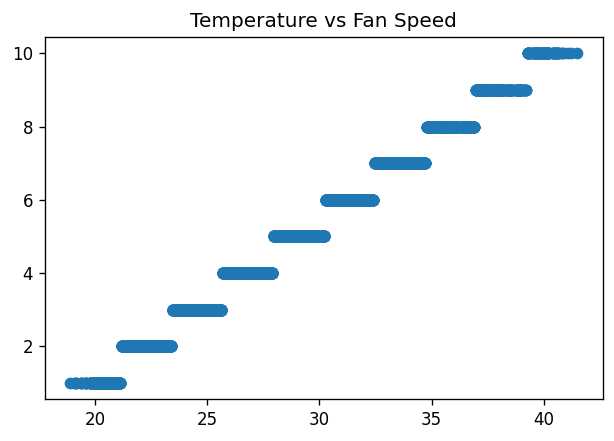

In [14]:
fig, axe = plt.subplots(dpi = 120)
axe.scatter(X, y)
axe.set_title("Temperature vs Fan Speed")
plt.show()

In [15]:
lr = LinearRegression()

In [16]:
X = np.array(X)
X = X.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [17]:
lr.fit(X, y)

LinearRegression()

In [18]:
bruh = lr.predict(X)

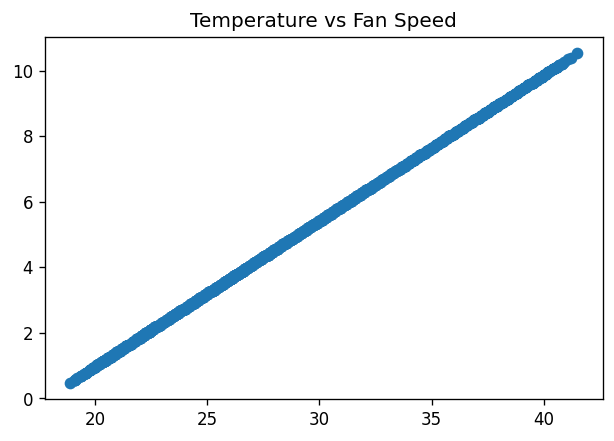

In [19]:
fig, axe = plt.subplots(dpi = 120)
axe.scatter(X, bruh)
axe.set_title("Temperature vs Fan Speed")
plt.show()

In [20]:
lr.predict(np.array(25).reshape(-1, 1))

array([[3.18822987]])

In [21]:
joblib.dump(lr, "model.pkl")

['model.pkl']